# 다이아몬드 가격 예측하기

In [1]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import draw_plots

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
# 데이터 불러오기
diamonds = pd.read_csv("DiamondsPrices2022.csv")
# 의미없는 컬럼인 Unnamed drop 
diamonds.drop("Unnamed: 0", axis= 1 , inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# info 확인
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


> null값 없음      
> 53943 rows      
> dtype 확인    

In [5]:
# 수치 데이터 
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> x , y , z 컬럼에 0 값이 왜 있지?

In [6]:
# x,y,z 컬럼이 0 값인 데이터 
len(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index)

20

> 가로, 세로 높이의 길이가 0이 나올 수 없으므로 결측치 처리. 전체 53943개 중 20개

In [7]:
# 0 데이터 삭제
diamonds.drop(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 20개 데이터가 삭제 되어 53923 rows × 10 columns

In [9]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


> Q ) 원핫인코딩으로 정제하는게 좋을지 , 단계별 숫자를 할당 (ex 'Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 5,4,3,2,1) 해서 하는게 좋을지       
> A ) 순서에 의미가 있으면 숫자로 변환하면 된다. 1부터 시작하는게 좋다. 

### 데이터 정규화, 표준화 하는법
같은 단위로 측정한 컬럼은 같이 스케일 하면 된다. (x,y,z - mm)        
depth 처럼 계산되어있는 컬럼은 정규화 한 xyz로 다시 계산하여 새로 컬럼을 만든다.       
table 처럼 percentage 컬럼은 계산 식이 없기 때문에 100으로 나눠 정규화 한다.             
caret은 따로 정규화(min , max)            

## 컬럼 설명
- carat : 캐럿 (중량) 
| 다이아몬드 캐럿은 다이아몬드의 무게를 측정합니다         
| 0.2 ~ 5.01

- cut : 컷팅 
| 다이아몬드 컷은 다이아몬드의 면이 빛과 얼마나 잘 상호 작용하는지를 의미합니다               
| (하) Fair, Good, Very Good, Premium, Ideal (상)             

- color : 색 
| 화학적으로 순수하고 구조적으로 완벽한 다이아몬드는 순수한 물 한 방울과 같은 색조가 없으므로 결과적으로 더 높은 가치가 있습니다. (D~Z)             
| (상) D E F G H I J  (하)

- clarity : 투명도 
| 다이아몬드 선명도는 내포물 및 흠이 없음을 나타냅니다. (I1~IF)            
| (상) IF , VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (하)

- depth : total depth percentage = z / mean(x, y) 
| [ 2 * z / (x + y) ]               
| 43 ~ 79

- table : 다이아몬드 테이블 
| width of top of diamond relative to widest point(%)          
| 43 ~ 95

- price : 가격 
| 단위 $             
| 326 ~ 18823

- x : 측정 길이 length 
| 단위 mm          
| 3.73 ~ 10.74

- y : 측정 너비 width
| 단위 mm             
| 3.68 ~ 58.9

- z : 측정 깊이 depth
| 단위 mm              
| 1.07 ~ 31.8

> 설명 출처 : https://4cs.gia.edu/en-us/diamond-cut/

In [10]:
diamondsV2 = diamonds.copy()

# 이상치 제거

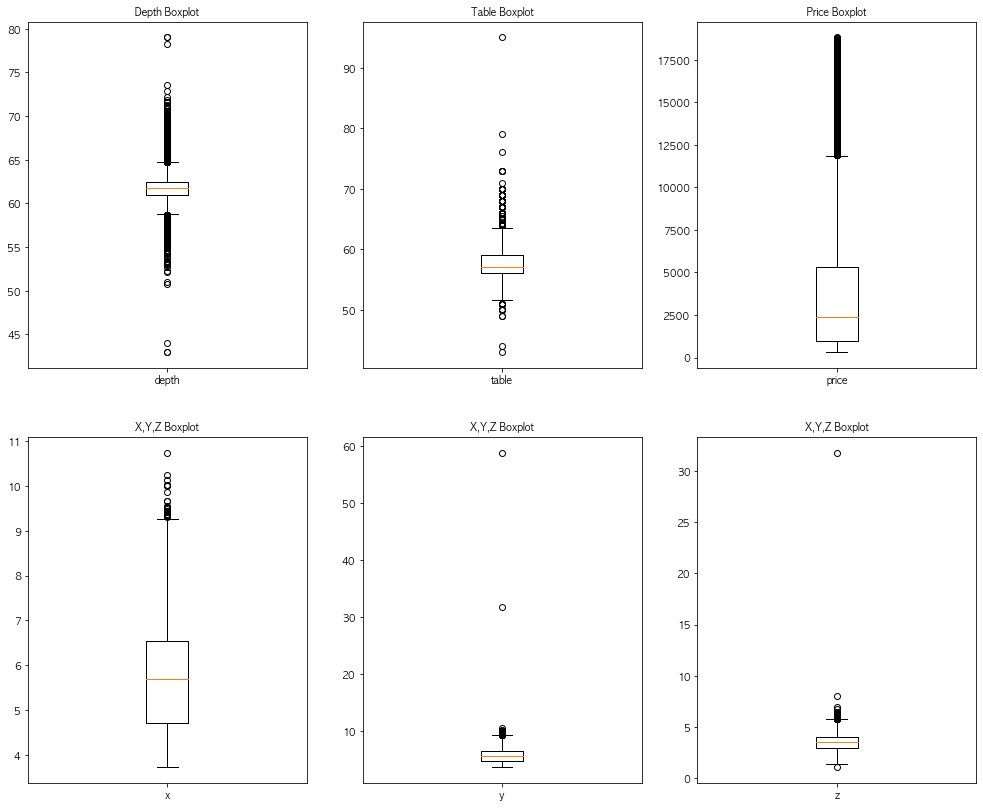

In [11]:
# boxplot을 그려서 현재 형태 확인
draw_plots.boxplot_by_columns(diamonds)

> 박스 사이즈 길이 보다 멀리 떨어져 있으면 이상치 이다.

> 몇 컬럼에서 이상치 제거 필요성 느낌            
> depth (48~75) , table (45~80) , y (0~20) , z (0~10)

In [12]:
diamonds.drop(diamonds[(diamonds['depth'] < 48) | (diamonds['depth'] > 75)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['table'] < 45) | (diamonds['table'] > 80)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['y'] > 20)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['z'] > 10)].index , inplace= True)
# 12개 삭제 되었다

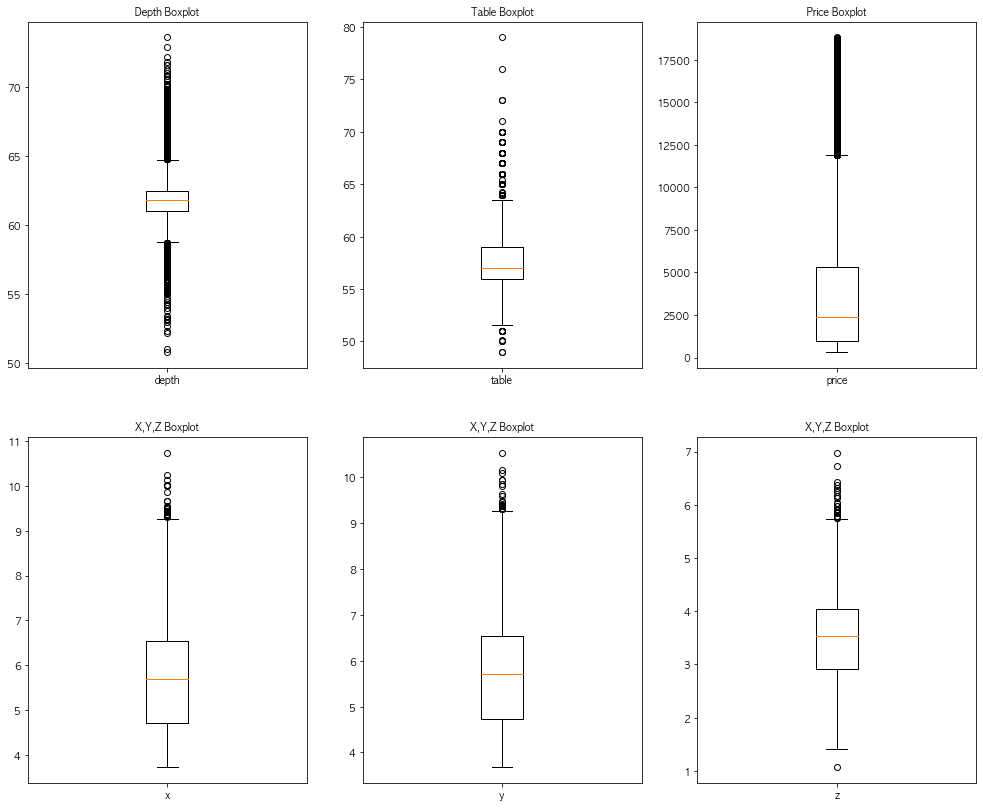

In [13]:
# 이상치 제거 후 boxplot 그리기
draw_plots.boxplot_by_columns(diamonds)

In [16]:
# 카테고리 컬럼 빈도수 확인
colums = ['cut' , 'color' , 'clarity']
for col in colums:
   print("Column :", col)
   print(diamonds[col].value_counts().sort_values())
   print("--------------------------------")

Column : cut
Fair          1603
Good          4902
Very Good    12080
Premium      13781
Ideal        21545
Name: cut, dtype: int64
--------------------------------
Column : color
J     2807
I     5420
D     6774
H     8297
F     9538
E     9793
G    11282
Name: color, dtype: int64
--------------------------------
Column : clarity
I1        737
IF       1790
VVS1     3654
VVS2     5066
VS1      8166
SI2      9184
VS2     12251
SI1     13063
Name: clarity, dtype: int64
--------------------------------


## 데이터 시각화

### 가격 기준 그래프

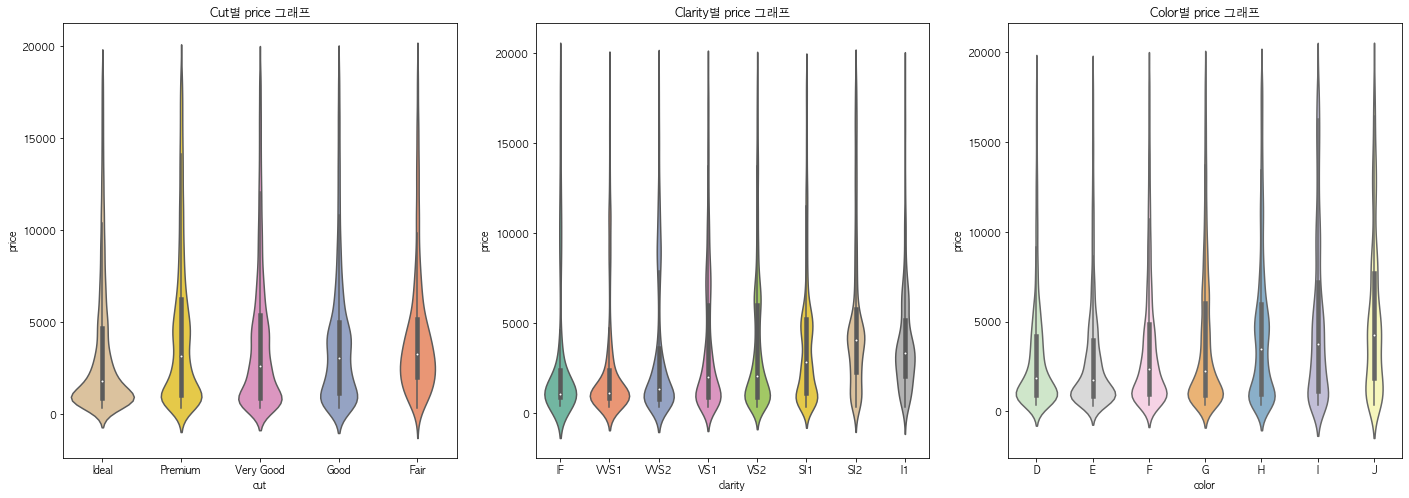

In [19]:
draw_plots.draw_violin_plot_ordered(diamonds, 'price')

### 캐럿 기준 그래프

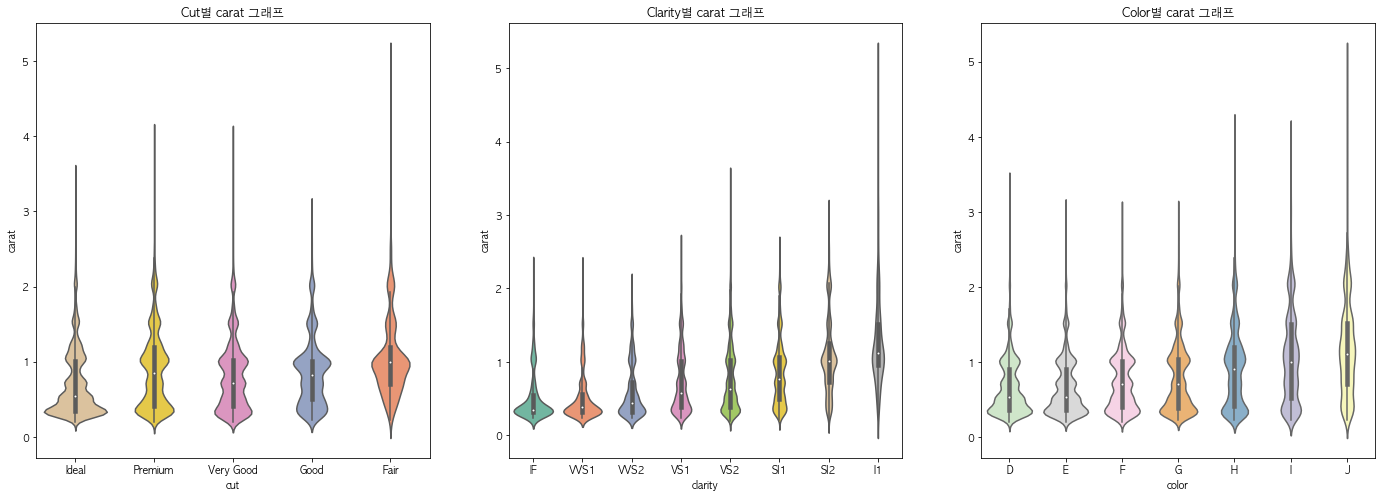

In [20]:
draw_plots.draw_violin_plot_ordered(diamonds, 'carat')

### 캐럿 당 가격 컬럼 추가하고 확인

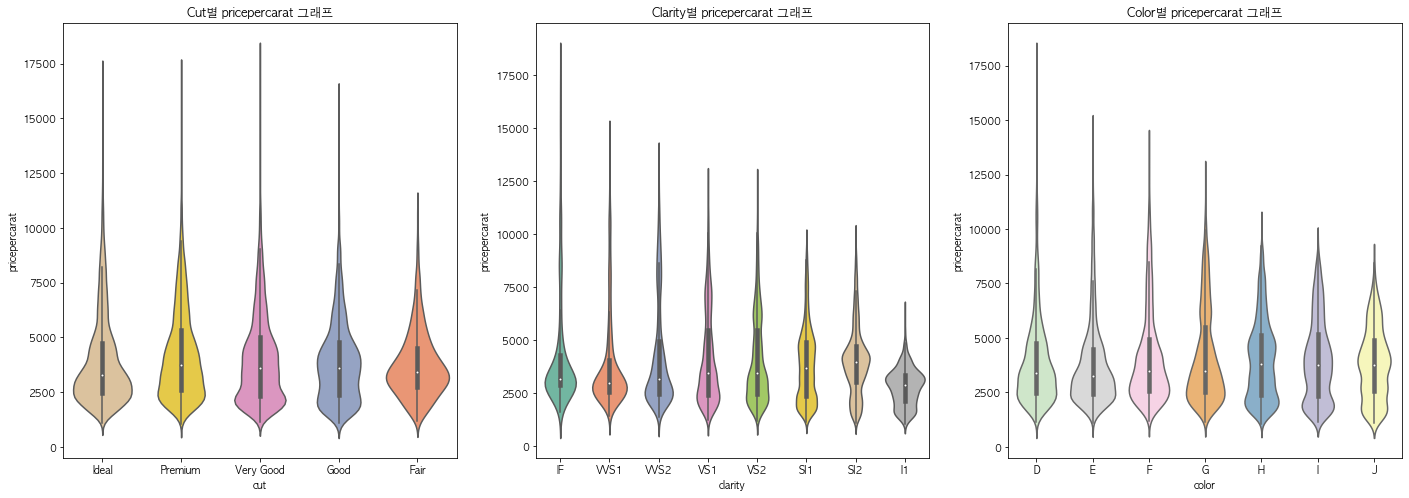

In [37]:
diamonds_2 = diamonds.copy()
diamonds_2['pricepercarat'] = diamonds_2['price'] / diamonds_2['carat']

draw_plots.draw_violin_plot_ordered(diamonds_2, 'pricepercarat')

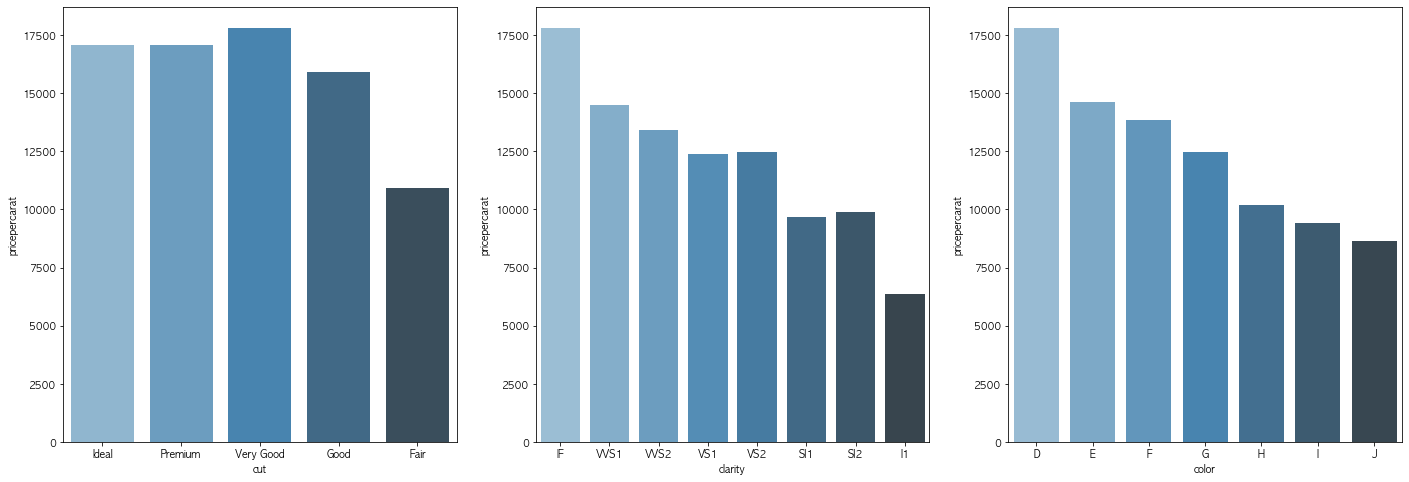

In [42]:
# draw barplot with seaborn


fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x = 'cut',
    y = 'pricepercarat',
    data = diamonds_2,
    order = cut_order,
    palette = "Blues_d",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax1,
)
sns.barplot(
    x = 'clarity',
    y = 'pricepercarat',
    data = diamonds_2,
    order = clarity_order,
    palette = "Blues_d",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax2,
)
sns.barplot(
    x = 'color',
    y = 'pricepercarat',
    data = diamonds_2,
    order = color_order,
    palette = "Blues_d",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax3,
)
plt.show()

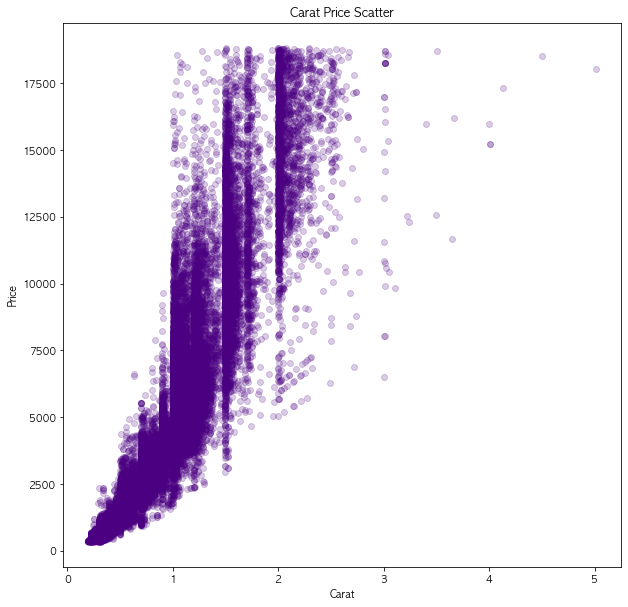

In [21]:
# 캐럿당 가격 산점도 색별 구분
plt.figure(figsize = (10,10))
plt.scatter(
    'carat',
    'price',
    data = diamonds,
    alpha=0.2,
    color = "indigo",
)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat Price Scatter")
plt.show()

carat & price 와 카테고리 컬럼들

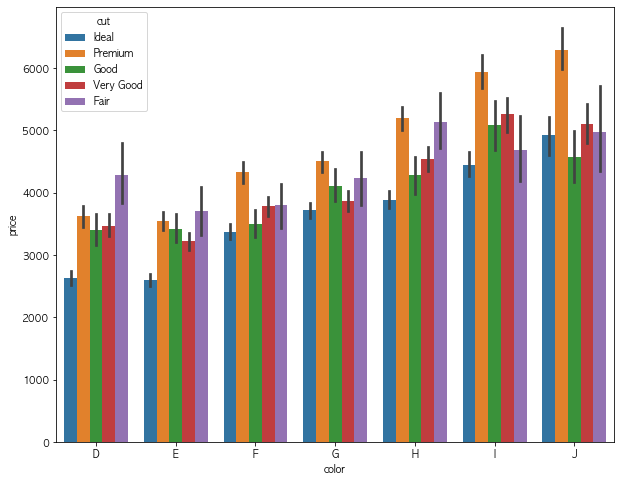

In [22]:
plt.figure(figsize = (10,8))
sns.barplot(
    x = 'color',
    y = 'price',
    data = diamonds,
    order= color_order,
    hue='cut'
    # ax = ax1,
    # ci = 'sd', # 오차막대를 어떤거로 보여줄지 설정
) 
plt.show()

---

### 다이아몬드 상관계수

### 글자 데이터를 정수로 변환
cut , color , clarity 컬럼

In [ ]:
diamondsV2['cut'] = diamondsV2['cut'].map({"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5})
diamondsV2['color'] = diamondsV2['color'].map({"D" : 7 ,"E" : 6 ,"F" : 5 ,"G" : 4 , "H" : 3 , "I" : 2 , "J" : 1})
diamondsV2['clarity'] = diamondsV2['clarity'].map({"IF" : 8 , "VVS1" : 7 , "VVS2" : 6 , "VS1" : 5 , "VS2" : 4 , "SI1" : 3 , "SI2" : 2 , "I1" : 1})
diamondsV2.head()

In [26]:
# 상관계수
diamondsV2.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134950,-0.291363,-0.352749,0.028269,0.181630,0.921592,0.977777,0.953990,0.961047
cut,-0.134950,1.000000,0.020504,0.189149,-0.218055,-0.433289,-0.053487,-0.126230,-0.122181,-0.150645
color,-0.291363,0.020504,1.000000,-0.025798,-0.047410,-0.026473,-0.172439,-0.270665,-0.263910,-0.270010
clarity,-0.352749,0.189149,-0.025798,1.000000,-0.067428,-0.160257,-0.146781,-0.372863,-0.359012,-0.370244
depth,0.028269,-0.218055,-0.047410,-0.067428,1.000000,-0.295753,-0.010712,-0.025017,-0.029068,0.095026
table,0.181630,-0.433289,-0.026473,-0.160257,-0.295753,1.000000,0.127229,0.196086,0.184484,0.152469
price,0.921592,-0.053487,-0.172439,-0.146781,-0.010712,0.127229,1.000000,0.887229,0.867862,0.868206
x,0.977777,-0.126230,-0.270665,-0.372863,-0.025017,0.196086,0.887229,1.000000,0.974918,0.975435
y,0.953990,-0.122181,-0.263910,-0.359012,-0.029068,0.184484,0.867862,0.974918,1.000000,0.956743
z,0.961047,-0.150645,-0.270010,-0.370244,0.095026,0.152469,0.868206,0.975435,0.956743,1.000000


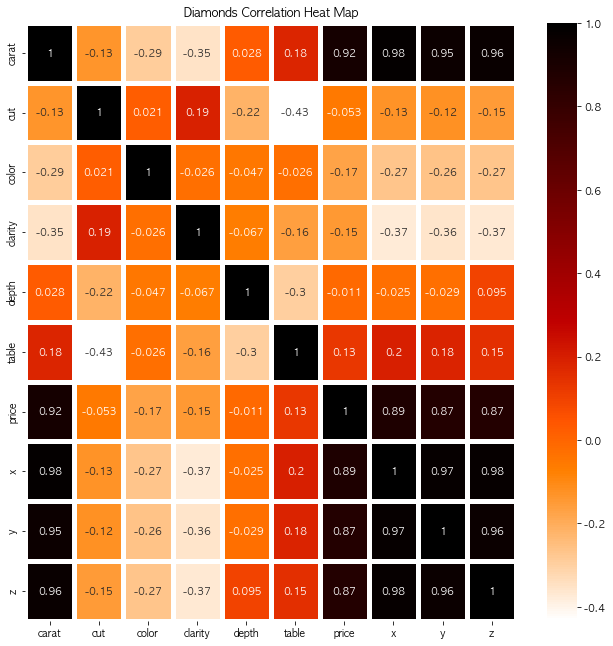

In [27]:
plt.figure(figsize=(11,11))
sns.heatmap(
    diamondsV2.corr(), # data
    annot= True, # 숫자 표기
    linewidths= 5, # 간격
    cmap = 'gist_heat_r',
    cbar= True , # 컬러바
)
plt.title("Diamonds Correlation Heat Map")
plt.show()